         Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    601     611        599       614           582   
unique       614      2       2          4         2             2   
top     LP002990   Male     Yes          0  Graduate            No   
freq           1    489     398        345       480           500   
mean         NaN    NaN     NaN        NaN       NaN           NaN   
std          NaN    NaN     NaN        NaN       NaN           NaN   
min          NaN    NaN     NaN        NaN       NaN           NaN   
25%          NaN    NaN     NaN        NaN       NaN           NaN   
50%          NaN    NaN     NaN        NaN       NaN           NaN   
75%          NaN    NaN     NaN        NaN       NaN           NaN   
max          NaN    NaN     NaN        NaN       NaN           NaN   

        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count        614.000000         614.000000  592.000000         600.00000   
unique 

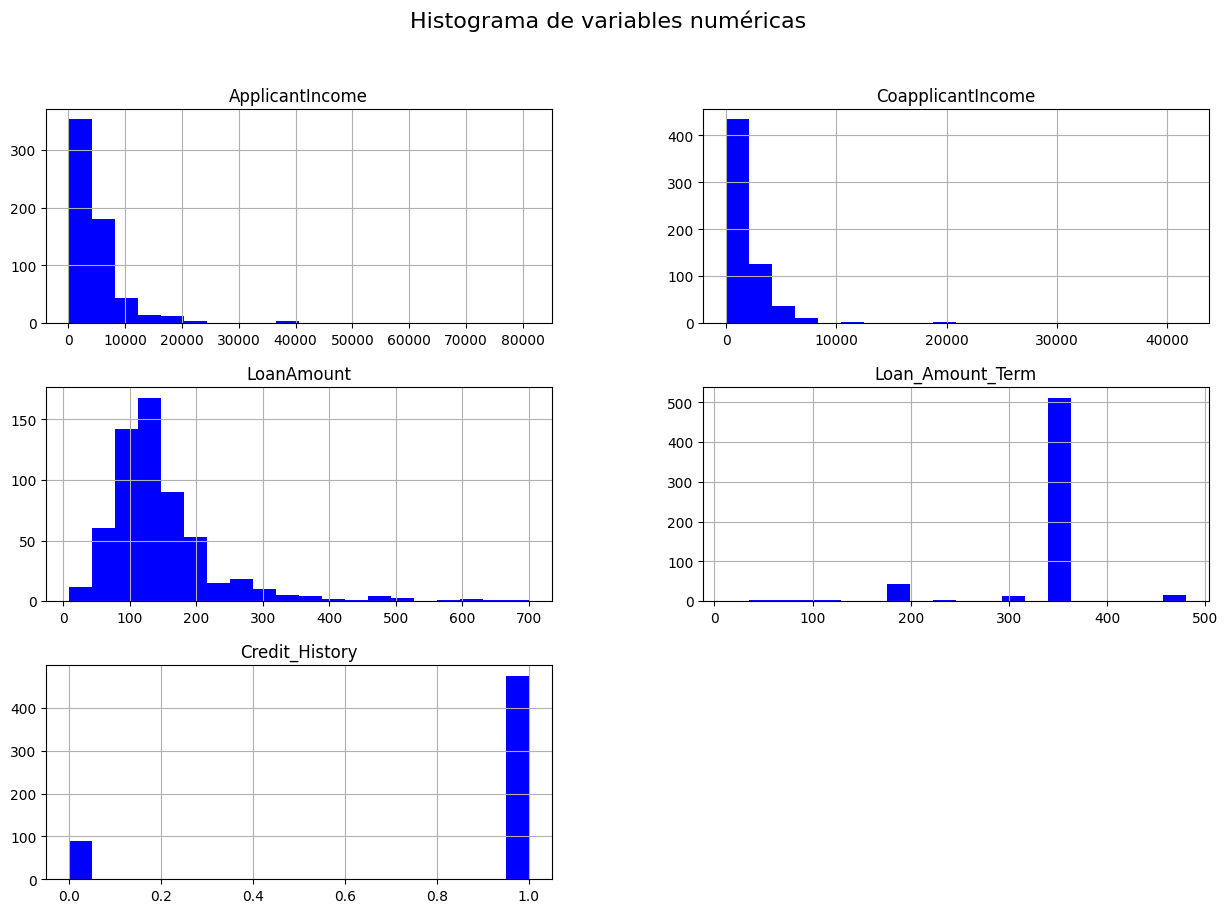

ValueError: could not convert string to float: 'LP001002'

<Figure size 1000x800 with 0 Axes>

In [3]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('E:/Bootcamp/loan/train.csv')

# Análisis estadístico descriptivo
descriptive_stats = df.describe(include='all')
print(descriptive_stats)

# Revisar valores faltantes
missing_values = df.isnull().sum()
print("Valores faltantes:\n", missing_values)

# Visualizar distribución de las variables numéricas
df.hist(bins=20, figsize=(15,10), color='blue')
plt.suptitle('Histograma de variables numéricas', fontsize=16)
plt.show()

# Visualizar correlaciones con un mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones', fontsize=16)
plt.show()

# Visualizar las distribuciones de las variables categóricas con gráficos de barras
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for col in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col], palette='Set2')
    plt.title(f'Distribución de {col}', fontsize=14)
    plt.show()


In [4]:
# Imputar valores faltantes en las variables categóricas con el valor más frecuente (moda)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

# Imputar valores faltantes en las variables numéricas con la mediana
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(), inplace=True)

# Verificar nuevamente si quedan valores faltantes
missing_values_after = df.isnull().sum()
print("Valores faltantes después de la imputación:\n", missing_values_after)


Valores faltantes después de la imputación:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


C:\Users\chave\AppData\Local\Temp\ipykernel_1264\970537979.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
C:\Users\chave\AppData\Local\Temp\ipykernel_1264\970537979.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

C:\Users\chave\AppData\Local\Temp\ipykernel_1264\1213024826.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set3')


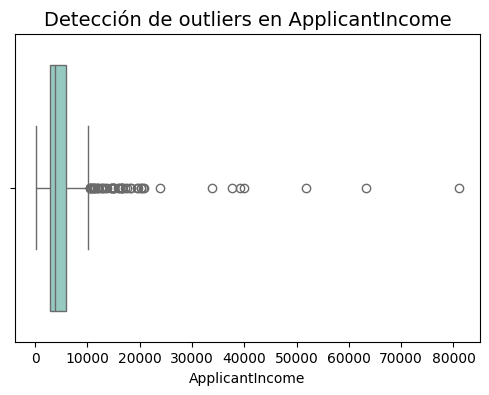

C:\Users\chave\AppData\Local\Temp\ipykernel_1264\1213024826.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set3')


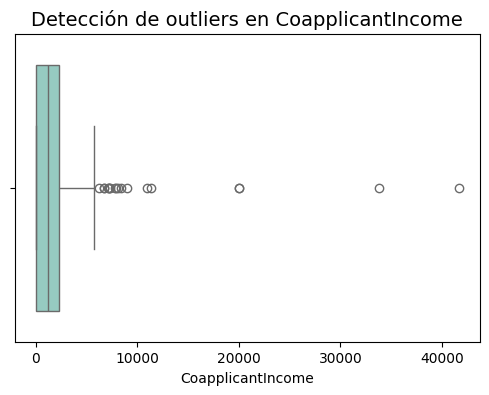

C:\Users\chave\AppData\Local\Temp\ipykernel_1264\1213024826.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set3')


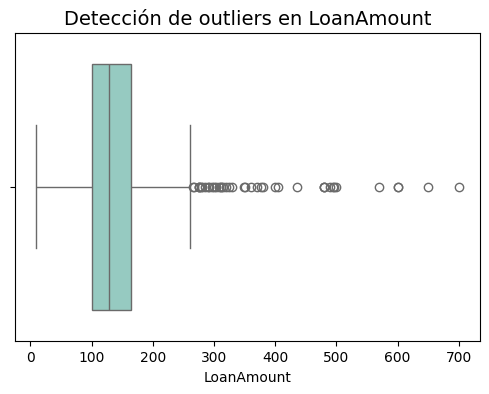

In [5]:
# Visualizar outliers con gráficos de caja y bigotes (boxplot)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], palette='Set3')
    plt.title(f'Detección de outliers en {col}', fontsize=14)
    plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Variables independientes (features) y la variable dependiente (target)
X = df.drop(columns=['Loan_ID', 'Loan_Status'])  # Excluir Loan_ID y Loan_Status
y = df['Loan_Status']  # Esta es la variable objetivo

# Codificar las variables categóricas usando One-Hot Encoding
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocesamiento: OneHotEncoding para categóricas y StandardScaler para numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Aplicar el preprocesamiento en los datos de entrenamiento
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

print("Preprocesamiento completado. Datos listos para el entrenamiento.")


Preprocesamiento completado. Datos listos para el entrenamiento.


In [7]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Crear el modelo LGBM
model = lgb.LGBMClassifier()

# Entrenar el modelo
model.fit(X_train_preprocessed, y_train)

# Hacer predicciones
y_pred = model.predict(X_test_preprocessed)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Y')
recall = recall_score(y_test, y_pred, pos_label='Y')
f1 = f1_score(y_test, y_pred, pos_label='Y')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_preprocessed)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")


[LightGBM] [Info] Number of positive: 302, number of negative: 127
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 429, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703963 -> initscore=0.866240
[LightGBM] [Info] Start training from score 0.866240
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [8]:
from sklearn.model_selection import GridSearchCV

# Definir la grilla de hiperparámetros
param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200]
}

# Aplicar GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_preprocessed, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo
y_pred_best = best_model.predict(X_test_preprocessed)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"Mejor modelo - Accuracy: {accuracy_best}")


[LightGBM] [Info] Number of positive: 242, number of negative: 101
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 285
[LightGBM] [Info] Number of data points in the train set: 343, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.705539 -> initscore=0.873817
[LightGBM] [Info] Start training from score 0.873817
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[